In [1103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.metrics import r2_score

In [1104]:
df = pd.read_csv('/content/AB_NYC_2019.csv')

In [1105]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


# Análise

In [1106]:
# esse método cat.codes é só pra fazer uma análise sem precisar usar label encoder

df['neighbourhood_group']= df['neighbourhood_group'].astype("category").cat.codes
df['neighbourhood'] = df['neighbourhood'].astype("category").cat.codes
df['room_type'] = df['room_type'].astype("category").cat.codes

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Price Distribution Plot')

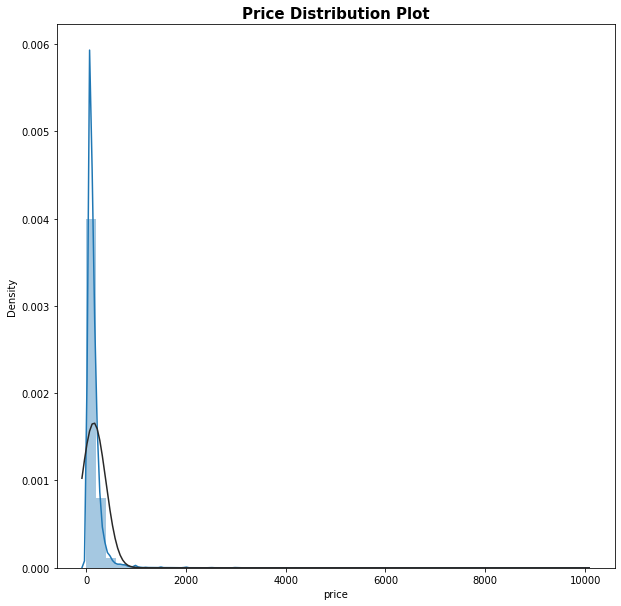

In [1107]:
plt.figure(figsize=(10,10))
sns.distplot(df['price'], fit=norm)
plt.title("Price Distribution Plot",size=15, weight='bold')

In [1108]:
df['price_log'] = np.log(df.price+1)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Log-Price Distribution Plot')

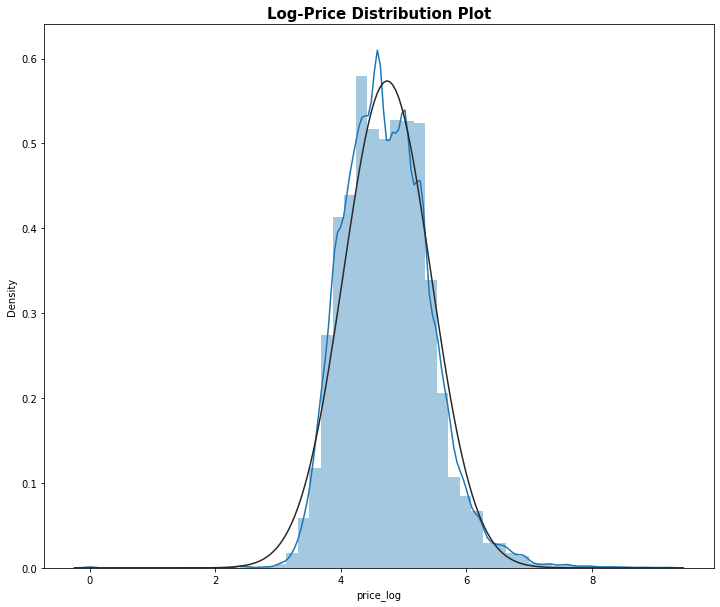

In [1109]:
plt.figure(figsize=(12,10))
sns.distplot(df['price_log'], fit=norm)
plt.title("Log-Price Distribution Plot",size=15, weight='bold')

# Limpeza

In [1110]:
# tirando colunas que nao serão usadas
df = df.drop(columns=['name','id' ,'host_id','host_name', 
                                   'last_review','price'])

In [1111]:
df.isnull().sum()

neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
price_log                             0
dtype: int64

In [1112]:
mean = df['reviews_per_month'].mean()
df['reviews_per_month'].fillna(mean, inplace=True)

In [1113]:
df.isnull().sum()

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
price_log                         0
dtype: int64

Text(0.5, 1.0, 'Correlation Matrix')

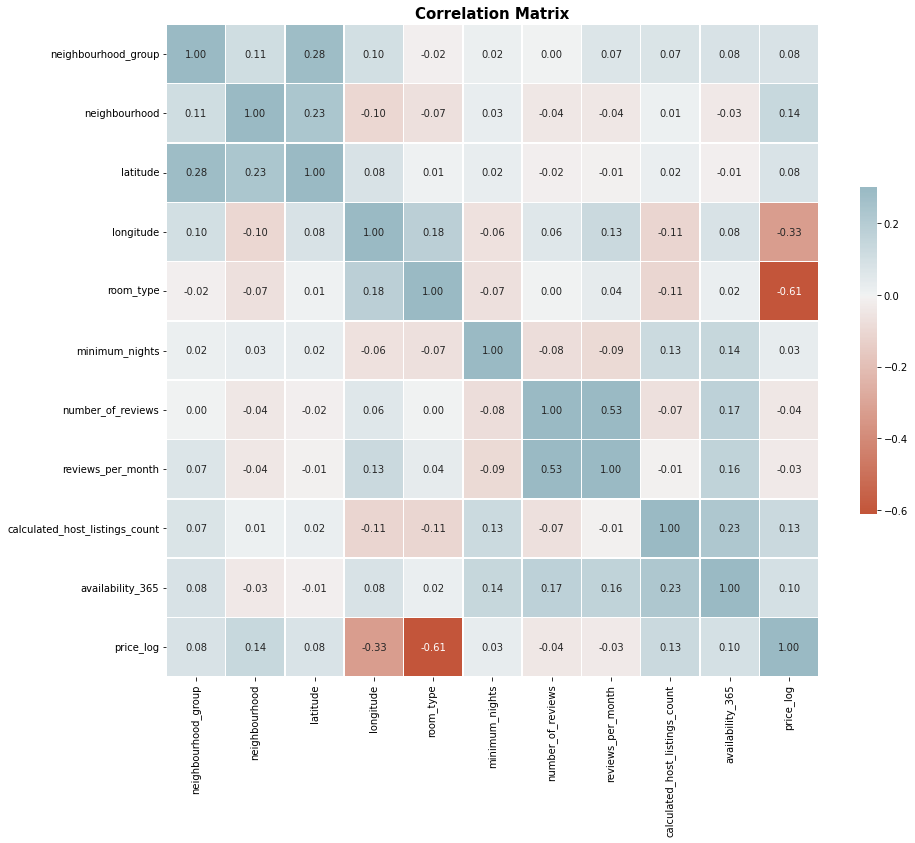

In [1114]:
plt.figure(figsize=(15,12))
palette = sns.diverging_palette(20, 220, n=256)
corr=df.corr(method='pearson')
sns.heatmap(corr, annot=True, fmt=".2f", cmap=palette, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}).set(ylim=(11, 0))
plt.title("Correlation Matrix",size=15, weight='bold')

In [1115]:
df_x = df.iloc[:,:-1]
df_x

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,1,108,40.64749,-73.97237,1,1,9,0.210000,6,365
1,2,127,40.75362,-73.98377,0,1,45,0.380000,2,355
2,2,94,40.80902,-73.94190,1,3,0,1.373221,1,365
3,1,41,40.68514,-73.95976,0,1,270,4.640000,1,194
4,2,61,40.79851,-73.94399,0,10,9,0.100000,1,0
...,...,...,...,...,...,...,...,...,...,...
48890,1,13,40.67853,-73.94995,1,2,0,1.373221,2,9
48891,1,28,40.70184,-73.93317,1,4,0,1.373221,2,36
48892,2,94,40.81475,-73.94867,0,10,0,1.373221,1,27
48893,2,95,40.75751,-73.99112,2,1,0,1.373221,6,2


In [1116]:
type(df_x)

pandas.core.frame.DataFrame

In [1117]:
df

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price_log
0,1,108,40.64749,-73.97237,1,1,9,0.210000,6,365,5.010635
1,2,127,40.75362,-73.98377,0,1,45,0.380000,2,355,5.420535
2,2,94,40.80902,-73.94190,1,3,0,1.373221,1,365,5.017280
3,1,41,40.68514,-73.95976,0,1,270,4.640000,1,194,4.499810
4,2,61,40.79851,-73.94399,0,10,9,0.100000,1,0,4.394449
...,...,...,...,...,...,...,...,...,...,...,...
48890,1,13,40.67853,-73.94995,1,2,0,1.373221,2,9,4.262680
48891,1,28,40.70184,-73.93317,1,4,0,1.373221,2,36,3.713572
48892,2,94,40.81475,-73.94867,0,10,0,1.373221,1,27,4.753590
48893,2,95,40.75751,-73.99112,2,1,0,1.373221,6,2,4.025352


In [1118]:
df_y = df.iloc[:,-1]
df_y

0        5.010635
1        5.420535
2        5.017280
3        4.499810
4        4.394449
           ...   
48890    4.262680
48891    3.713572
48892    4.753590
48893    4.025352
48894    4.510860
Name: price_log, Length: 48895, dtype: float64

# Normalização e Divisão

In [1119]:
# normalização

scaler = StandardScaler()
df_x = scaler.fit_transform(df_x)

In [1120]:
# divisão

X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.3, random_state=42)

In [1121]:
# essa etapa aqui é pra mostrar que o neighborhood group e room type são irrelevantes, mas tá dando erro de RAM

"""
lab_enc = preprocessing.LabelEncoder()

feature_model = ExtraTreesClassifier(n_estimators=50)
feature_model.fit(X_train,lab_enc.fit_transform(y_train))

plt.figure(figsize=(7,7))
feat_importances = pd.Series(feature_model.feature_importances_, index=df.iloc[:,:-1].columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()
"""

"\nlab_enc = preprocessing.LabelEncoder()\n\nfeature_model = ExtraTreesClassifier(n_estimators=50)\nfeature_model.fit(X_train,lab_enc.fit_transform(y_train))\n\nplt.figure(figsize=(7,7))\nfeat_importances = pd.Series(feature_model.feature_importances_, index=df.iloc[:,:-1].columns)\nfeat_importances.nlargest(10).plot(kind='barh')\nplt.show()\n"

In [1122]:
type(df_x)

numpy.ndarray

#Treino Regressão Simples

In [1123]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import metrics 

regressao = LinearRegression()
reg = regressao.fit(X_train,y_train)

# Treino - k Fold = 5

In [1124]:
### K-Fold Cross Validation ###

kfold_cv = KFold(n_splits=5)
for train_index, test_index in kfold_cv.split(df_x,df_y):
    print("Train:", train_index, "Validation:", test_index)
    X_train, X_test = df_x[train_index], df_x[test_index]
    y_train, y_test = df_y[train_index], df_y[test_index]

Train: [ 9779  9780  9781 ... 48892 48893 48894] Validation: [   0    1    2 ... 9776 9777 9778]
Train: [    0     1     2 ... 48892 48893 48894] Validation: [ 9779  9780  9781 ... 19555 19556 19557]
Train: [    0     1     2 ... 48892 48893 48894] Validation: [19558 19559 19560 ... 29334 29335 29336]
Train: [    0     1     2 ... 48892 48893 48894] Validation: [29337 29338 29339 ... 39113 39114 39115]
Train: [    0     1     2 ... 39113 39114 39115] Validation: [39116 39117 39118 ... 48892 48893 48894]


In [1125]:
X_train[0]

array([-0.91782758,  0.01276167, -1.4938492 , -0.43765209,  0.90935915,
       -0.29399621, -0.32041358, -0.77664098, -0.03471643,  1.91625031])

# Previsão

In [1126]:
##Linear Regression with k-fold
lr = LinearRegression(copy_X= True, fit_intercept = True, normalize = True)
lr.fit(X_train, y_train)
lr_pred= lr.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


In [1127]:
lr.coef_

array([ 0.03799279,  0.03994073,  0.04824233, -0.16497375, -0.38583378,
       -0.02875432, -0.04051471,  0.02104941,  0.01626603,  0.08801945])

In [1128]:
lr_pred

array([5.08419984, 4.44090851, 4.47406455, ..., 5.11756606, 3.80266631,
       4.51267634])

In [1129]:
error_airbnb_lr = pd.DataFrame({
  'Actual Values (log)': np.array(y_test).flatten(),
  'Predicted Values (log)': lr_pred.flatten()})
diff = np.array(y_test).flatten() - lr_pred.flatten()
error_airbnb_lr['Margin of Error'] = diff
erro_dol = np.exp(error_airbnb_lr['Margin of Error'])
error_airbnb_lr['Margin of Error (Dolar)'] = erro_dol
error_airbnb_lr.drop("Margin of Error", axis = 1, inplace = True)
error_airbnb_lr.to_csv('/content/error_airbnb_lr.csv', sep='\t', encoding='utf-8')
error_airbnb_lr

,Actual Values (log),Predicted Values (log),Margin of Error (Dolar)
0,6.111467,5.084200,2.793422
1,5.298317,4.440909,2.357045
2,4.709530,4.474065,1.265498
3,4.510860,5.191789,0.506146
4,6.311735,5.116143,3.305514
...,...,...,...
9774,4.262680,4.195135,1.069878
9775,3.713572,4.179749,0.627396
9776,4.753590,5.117566,0.694908
9777,4.025352,3.802666,1.249427


In [1130]:
erro_dol.mean()

1.2598766289476855

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipel

Text(0, 0.5, 'rmse')

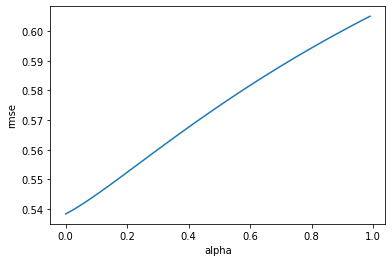

In [1131]:
#Estimando o melhor lambda para o Ridge Model

alphas = np.arange(0, 1, 0.01)
pred_ridge_aux = []
alpha_aux = []
for alpha in alphas : 
  ridge_model = Ridge(alpha = alpha, normalize = True)
  ridge_model.fit(X_train, y_train)             
  pred_ridge = ridge_model.predict(X_test) 
  rmse_ridge = np.sqrt(metrics.mean_squared_error(y_test,pred_ridge)) 
  pred_ridge_aux.append(rmse_ridge)
  alpha_aux.append(alpha)

 #if(pred_ridge_aux >= rmse_ridge):
 #   alpha_aux = alpha
 #  pred_ridge_aux = rmse_ridge
  
plt.plot(alpha_aux,pred_ridge_aux)
plt.xlabel('alpha')
plt.ylabel('rmse')

In [1132]:
#from sklearn.linear_model import RidgeCV

#clf = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1]).fit(X, y)
#clf.score(X, y)

In [1133]:
#Ridge Model
ridge_model = Ridge(alpha = 0.01, normalize = True)
#ridge_model = Ridge(alpha = 0, normalize = True)
ridge_model.fit(X_train, y_train)             
pred_ridge = ridge_model.predict(X_test) 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,


In [1134]:
#Estimando o melhor lambda para o Lasso Model
alphas = np.arange(0, 1.0, 0.01)
pred_lasso_aux = 1
alpha_aux = 0
for alpha in alphas : 
  lasso_model = Lasso(alpha = alpha, normalize = True)
  lasso_model.fit(X_train, y_train)             
  pred_lasso = lasso_model.predict(X_test) 
  rmse_lasso = np.sqrt(metrics.mean_squared_error(y_test,pred_lasso)) 
  if(pred_lasso_aux >= rmse_lasso):
    alpha_aux = alpha
    pred_lasso_aux = rmse_lasso

print('RMSE: %.3f' % pred_lasso_aux)
print('Config: %s' % alpha_aux)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning:

RMSE: 0.538
Config: 0.0


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from skle

In [1135]:
#Lasso Model
Lasso_model = Lasso(alpha = 0.001, normalize =False)
#Lasso_model = Lasso(alpha = 0, normalize =False)
Lasso_model.fit(X_train, y_train)
pred_Lasso = Lasso_model.predict(X_test) 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,


In [1136]:
#Estimando o melhor lambda para o ElasticNet Model
alphas = np.arange(0, 1.0, 0.01)
pred_ElasticNet_aux = 1
alpha_aux = 0
for alpha in alphas : 
  ElasticNet_model = ElasticNet(alpha = alpha, normalize = True)
  ElasticNet_model.fit(X_train, y_train)             
  pred_ElasticNet = ElasticNet_model.predict(X_test) 
  rmse_ElasticNet = np.sqrt(metrics.mean_squared_error(y_test,pred_ElasticNet)) 
  if(pred_ElasticNet_aux >= rmse_ElasticNet):
    alpha_aux = alpha
    pred_ElasticNet_aux = rmse_ElasticNet

print('RMSE: %.3f' % pred_ElasticNet_aux)
print('Config: %s' % alpha_aux)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to original_alpha * np.sqrt(n_samples) if l1_ratio is 1, and to original_alpha * n_samples if l1_ratio is 0. For other values of l1_ratio, no analytic formula is available.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the Line

RMSE: 0.538
Config: 0.0


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to original_alpha * np.sqrt(n_samples) if l1_ratio is 1, and to original_alpha * n_samples if l1_ratio is 0. For other values of l1_ratio, no analytic formula is available.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If

In [1137]:
#ElasticNet Model
model_enet = ElasticNet(alpha = 0.01, normalize=False)
#model_enet = ElasticNet(alpha = 0, normalize=False)
model_enet.fit(X_train, y_train) 
pred_test_enet= model_enet.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,


Linear regression without k-fold

In [1138]:
Y_pred_regressao = reg.predict(X_test)
print('------------- Linear Regression Simple -----------')

print('MAE: %f'% mean_absolute_error(y_test, Y_pred_regressao))
print('RMSE: %f'% np.sqrt(metrics.mean_squared_error(y_test,Y_pred_regressao)))   
print('R2 %f' % r2_score(y_test, Y_pred_regressao))

------------- Linear Regression Simple -----------
MAE: 0.389978
RMSE: 0.536052
R2 0.501930


In [1139]:
print('------------- Linear Regression Fold = 5 -----------')

print('MAE: %f'% mean_absolute_error(y_test, lr_pred))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test, lr_pred)))   
print('R2 %f' % r2_score(y_test, lr_pred))

------------- Linear Regression Fold = 5 -----------
MAE: 0.391340
RMSE: 0.538368
R2 0.497618


In [1140]:
print('--------------- Ridge Fold = 5 ---------------------')

print('MAE: %f'% mean_absolute_error(y_test, pred_ridge))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test, pred_ridge)))   
print('R2 %f' % r2_score(y_test, pred_ridge))

--------------- Ridge Fold = 5 ---------------------
MAE: 0.391743
RMSE: 0.538921
R2 0.496584


In [1141]:
print('--------------- Lasso Fold = 5 ---------------------')

print('MAE: %f' % mean_absolute_error(y_test, pred_Lasso))
print('RMSE: %f' % np.sqrt(mean_squared_error(y_test, pred_Lasso)))
print('R2 %f' % r2_score(y_test, pred_Lasso))

--------------- Lasso Fold = 5 ---------------------
MAE: 0.390916
RMSE: 0.538550
R2 0.497277


In [1142]:
print('--------------- ElasticNet Fold = 5 -------------------')

print('MAE: %f' % mean_absolute_error(y_test,pred_test_enet)) #RMSE
print('RMSE: %f' % np.sqrt(mean_squared_error(y_test,pred_test_enet))) #RMSE
print('R2 %f' % r2_score(y_test, pred_test_enet))

--------------- ElasticNet Fold = 5 -------------------
MAE: 0.390361
RMSE: 0.540712
R2 0.493233


# Gráfico dos Resultados

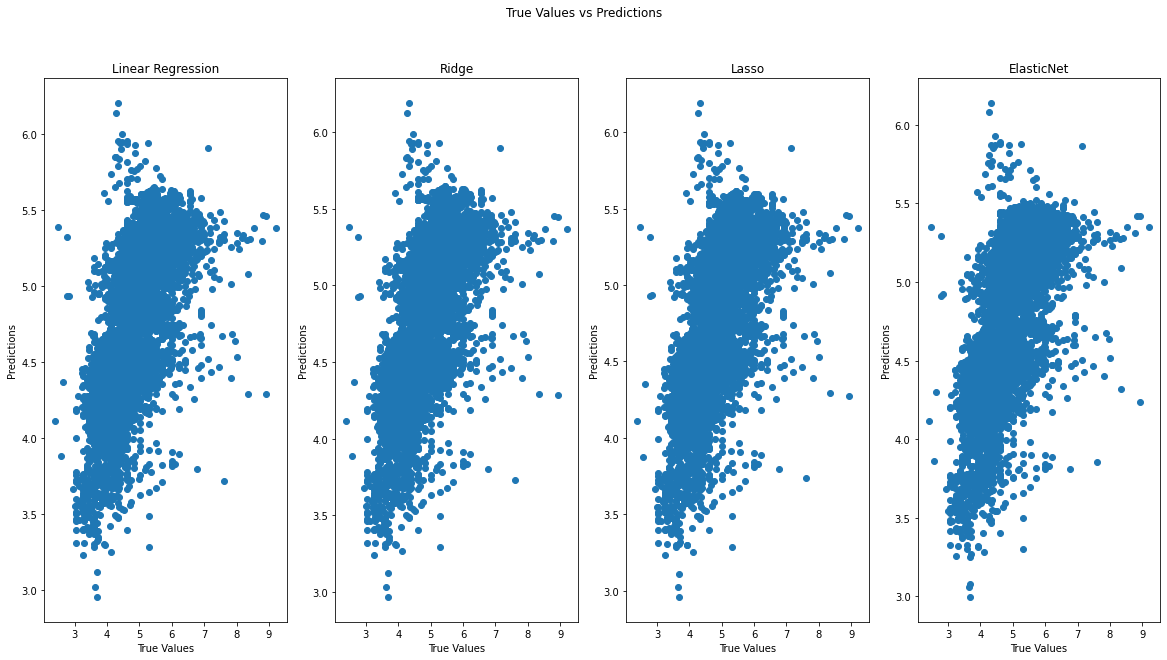

In [1143]:
fig, ((ax1, ax2, ax3, ax4)) = plt.subplots(1, 4, figsize=(20, 10))
fig.suptitle('True Values vs Predictions')

ax1.scatter(y_test, lr_pred)
ax1.set_title('Linear Regression')

ax2.scatter(y_test, pred_ridge)
ax2.set_title('Ridge')

ax3.scatter(y_test, pred_Lasso)
ax3.set_title('Lasso')

ax4.scatter(y_test, pred_test_enet)
ax4.set_title('ElasticNet')

for ax in fig.get_axes():
    ax.set(xlabel='True Values', ylabel='Predictions')

# Comparação dos Resultados

In [1144]:
error_airbnb_ridge = pd.DataFrame({
  'Actual Values (log)': np.array(y_test).flatten(),
  'Predicted Values (log)': pred_ridge.flatten()}) 
diff = np.array(y_test).flatten() - pred_ridge.flatten()
error_airbnb_ridge['Margin of Error'] = diff
erro_dol = np.exp(error_airbnb_ridge['Margin of Error'])
error_airbnb_ridge['Margin of Error (Dolar)'] = erro_dol
error_airbnb_ridge.drop("Margin of Error", axis = 1, inplace = True)
error_airbnb_ridge.to_csv('/content/error_airbnb_ridge.csv', sep='\t', encoding='utf-8')
error_airbnb_ridge

,Actual Values (log),Predicted Values (log),Margin of Error (Dolar)
0,6.111467,5.077259,2.812880
1,5.298317,4.443183,2.351690
2,4.709530,4.476372,1.262581
3,4.510860,5.187131,0.508510
4,6.311735,5.112458,3.317717
...,...,...,...
9774,4.262680,4.199052,1.065696
9775,3.713572,4.183646,0.624956
9776,4.753590,5.112807,0.698223
9777,4.025352,3.811455,1.238494


In [1145]:
erro_dol.mean()

1.2620289571936387

In [1146]:
error_airbnb_lasso = pd.DataFrame({
  'Actual Values (log)': np.array(y_test).flatten(),
  'Predicted Values (log)': pred_Lasso.flatten()})
diff = np.array(y_test).flatten() - pred_Lasso.flatten()
error_airbnb_lasso['Margin of Error'] = diff
erro_dol = np.exp(error_airbnb_lasso['Margin of Error'])
error_airbnb_lasso['Margin of Error (Dolar)'] = erro_dol
error_airbnb_lasso.drop("Margin of Error", axis = 1, inplace = True)
error_airbnb_lasso.to_csv('/content/error_airbnb_lasso.csv', sep='\t', encoding='utf-8')
error_airbnb_lasso

,Actual Values (log),Predicted Values (log),Margin of Error (Dolar)
0,6.111467,5.080281,2.804392
1,5.298317,4.436944,2.366409
2,4.709530,4.472182,1.267883
3,4.510860,5.190518,0.506790
4,6.311735,5.113460,3.314395
...,...,...,...
9774,4.262680,4.196599,1.068313
9775,3.713572,4.181063,0.626573
9776,4.753590,5.114348,0.697148
9777,4.025352,3.801700,1.250636


In [1147]:
erro_dol.mean()

1.2653950957033397

In [1148]:
error_airbnb_enet = pd.DataFrame({
  'Actual Values (log)': np.array(y_test).flatten(),
  'Predicted Values (log)': pred_test_enet.flatten()})
diff = np.array(y_test).flatten() - pred_test_enet.flatten()
error_airbnb_enet['Margin of Error'] = diff
erro_dol = np.exp(error_airbnb_enet['Margin of Error'])
error_airbnb_enet['Margin of Error (Dolar)'] = erro_dol
error_airbnb_enet.drop("Margin of Error", axis = 1, inplace = True)
error_airbnb_enet.to_csv('/content/error_airbnb_enet.csv', sep='\t', encoding='utf-8')
error_airbnb_enet

,Actual Values (log),Predicted Values (log),Margin of Error (Dolar)
0,6.111467,5.061609,2.857248
1,5.298317,4.422529,2.400768
2,4.709530,4.466036,1.275699
3,4.510860,5.183244,0.510490
4,6.311735,5.101151,3.355443
...,...,...,...
9774,4.262680,4.204632,1.059766
9775,3.713572,4.188509,0.621924
9776,4.753590,5.099358,0.707676
9777,4.025352,3.802469,1.249674


In [1149]:
erro_dol.mean()

1.2888355532140015

------------- Linear Regression Simple -----------

MAE: 0.398883

RMSE: 0.547897

R2 0.494697

------------- Linear Regression Fold = 5 -----------

MAE: 0.391340

RMSE: 0.538368

R2 0.497618

------------- Linear Regression Fold = 10 -----------

MAE: 0.399998

RMSE: 0.550990

R2 0.488976





#################################

--------------- Ridge Fold = 5 ---------------------

MAE: 0.391743

RMSE: 0.538921

R2 0.496584

--------------- Ridge Fold = 10 ---------------------

MAE: 0.400650

RMSE: 0.551755

R2 0.487556

#################################

--------------- Lasso Fold = 5 ---------------------

MAE: 0.390916

RMSE: 0.538550

R2 0.497277

--------------- Lasso Fold = 10 ---------------------

MAE: 0.400138

RMSE: 0.551495

R2 0.488039

#1 
Use the transformed predictors in the training set to learn an ordinary linear regression model and test the model using the test set (remember to apply the same
pre-processing you used on the training set). Compare the model performance obtained on the test set with the estimates you would obtain using a resampling scheme
as 5- or 10-fold cross validation: use both the RMSE and R2


Resultados: 

------------- Linear Regression Simple -----------

MAE: 0.389978

RMSE: 0.536052

R2 0.501930

------------- Linear Regression Fold = 5 -----------

MAE: 0.391340

RMSE: 0.538368

R2 0.497618


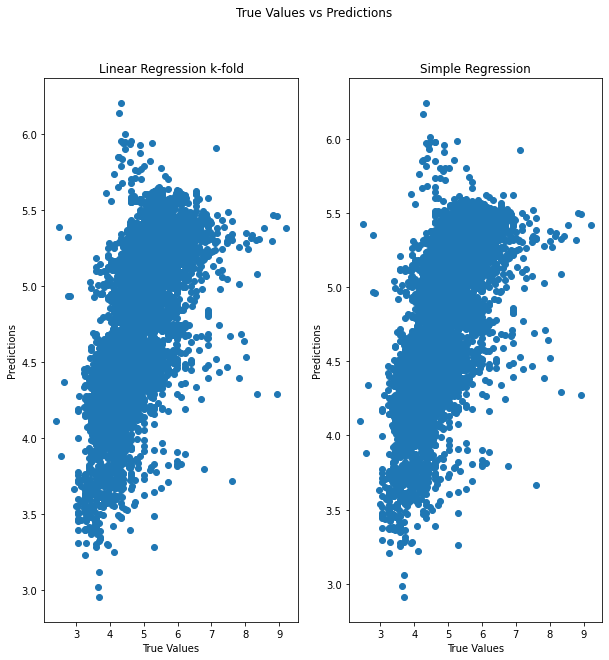

In [1150]:
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(10, 10))
fig.suptitle('True Values vs Predictions')

ax1.scatter(y_test, lr_pred)
ax1.set_title('Linear Regression k-fold')

ax2.scatter(y_test, Y_pred_regressao)
ax2.set_title('Simple Regression')


for ax in fig.get_axes():
    ax.set(xlabel='True Values', ylabel='Predictions')

#2 
Use the transformed predictors in the training set to learn the penalised linear regression model that you believe being more adequate (justify/comment on your choice). Test the model using the test set (remember to apply the same pre-processing you used on the training set). Determine the optimal value of the penalising parameter  using a 5- or 10-fold cross-validation based on the RMSE (you can only use the training set in this phase, and your search space  should consist of at least 10 values). Report on process (show the cross-validation profile, both on terms of the RMSE and R2). Report the accuracy (RMSE and R2) obtained on the test set.

Resultados: 

############################

**5- fold**

############################

Ridge:

MAE: 0.391743
RMSE: 0.538921
R2 0.496584

Lasso:

MAE: 0.390916
RMSE: 0.538550
R2 0.497277

ElasticNet:

MAE: 0.390361
RMSE: 0.540712
R2 0.493233

############################


#3
 Use the transformed predictors in the training set to learn either a PLS or a PCR regression model (justify/comment on your choice). Test the model using the test set (remember to apply the same pre-processing you used on the training set). Determine the optimal number of components using a 5- or 10-fold cross-validation based on the RMSE (you can only use the training set in this phase). Report on process (show the cross-validation profile, both in terms of the RMSE and R2). Report the accuracy (RMSE and R2) obtained on the test set.

PLS Model

In [1151]:
#df = pd.read_csv("/content/df_airbnb3.csv", sep = ";")

In [1152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error

In [1153]:
#define predictor and response variables
X = df[["neighbourhood_group", "neighbourhood", "latitude", "longitude", "room_type", "minimum_nights", "number_of_reviews", "reviews_per_month", "calculated_host_listings_count", "availability_365"]]
y = df[["price_log"]]

#define cross-validation method
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)

mse = []
n = len(X)

# Calculate MSE with only the intercept
score = -1*model_selection.cross_val_score(PLSRegression(n_components=1),
           np.ones((n,1)), y, cv=cv, scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using cross-validation, adding one component at a time
for i in np.arange(1, 6):
    pls = PLSRegression(n_components=i)
    score = -1*model_selection.cross_val_score(pls, scale(X), y, cv=cv,
               scoring='neg_mean_squared_error').mean()
    mse.append(score)

/usr/local/lib/python3.7/dist-packages/sklearn/cross_decomposition/_pls.py:93: RuntimeWarning: invalid value encountered in true_divide
  y_weights = np.dot(Y.T, x_score) / np.dot(x_score.T, x_score)
/usr/local/lib/python3.7/dist-packages/sklearn/cross_decomposition/_pls.py:325: RuntimeWarning: invalid value encountered in true_divide
  x_loadings = np.dot(x_scores, Xk) / np.dot(x_scores, x_scores)
/usr/local/lib/python3.7/dist-packages/sklearn/cross_decomposition/_pls.py:334: RuntimeWarning: invalid value encountered in true_divide
  y_loadings = np.dot(x_scores, Yk) / np.dot(x_scores, x_scores)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:775: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  Fi

Text(0.5, 1.0, 'MSE vs. number of components')

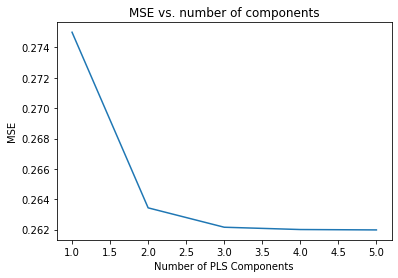

In [1154]:
#plot test MSE vs. number of components
plt.plot(mse)
plt.xlabel('Number of PLS Components')
plt.ylabel('MSE')
plt.title('MSE vs. number of components')

In [1155]:
#split the dataset into training (70%) and testing (30%) sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0) 

#calculate RMSE
pls = PLSRegression(n_components=3)
pls.fit(scale(X_train), y_train)

rmse = np.sqrt(mean_squared_error(y_test, pls.predict(scale(X_test))))

In [1156]:
print(f"R2: {round(score, 3)}")
print(f"RMSE: {round(rmse, 3)}")

R2: 0.262
RMSE: 0.517


In [1157]:
error_airbnb_pls = pd.DataFrame({
  'Actual Values (log)': np.array(y_test).flatten(),
  'Predicted Values (log)': pls.predict(scale(X_test)).flatten()})
diff = np.array(y_test).flatten() - pls.predict(scale(X_test)).flatten()
error_airbnb_pls['Margin of Error'] = diff
erro_dol = np.exp(error_airbnb_pls['Margin of Error'])
error_airbnb_pls['Margin of Error (Dolar)'] = erro_dol
error_airbnb_pls.drop("Margin of Error", axis = 1, inplace = True)
error_airbnb_pls.to_csv('/content/error_airbnb_pls.csv', sep='\t', encoding='utf-8')
error_airbnb_pls

,Actual Values (log),Predicted Values (log),Margin of Error (Dolar)
0,5.420535,5.350137,1.072935
1,6.476972,5.276160,3.322815
2,5.707110,5.061563,1.907030
3,3.295837,4.538205,0.288700
4,4.836282,4.846845,0.989493
...,...,...,...
14664,4.248495,4.198396,1.051376
14665,5.398163,5.155024,1.275246
14666,5.298317,4.526230,2.164279
14667,5.017280,5.296999,0.755996


In [1158]:
erro_dol.mean()

1.201527766079822

PLS 2

In [1159]:
from sys import stdout
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score

In [1160]:
#df = pd.read_csv("/content/df_airbnb3.csv", sep = ";")

In [1161]:
#df

In [1162]:
X = df[["neighbourhood_group", "neighbourhood", "latitude", "longitude", "room_type", "minimum_nights", "number_of_reviews", "reviews_per_month", "calculated_host_listings_count", "availability_365"]].values
y = df[["price_log"]]

In [1163]:
X.shape

(48895, 10)

In [1164]:
y.shape

(48895, 1)

In [1165]:
X2 = savgol_filter(X, 9, polyorder=2, deriv=2)

In [1166]:
def optimise_pls_cv(X, y, n_comp):
    # Define PLS object
    pls = PLSRegression(n_components=n_comp)

    # Cross-validation
    y_cv = cross_val_predict(pls, X, y, cv=5)

    # Calculate scores
    r2 = r2_score(y, y_cv)
    mse = mean_squared_error(y, y_cv)
    rpd = y.std()/np.sqrt(mse)
    
    return (y_cv, r2, mse, rpd)

In [1167]:
# test with 40 components
r2s = []
mses = []
rpds = []
xticks = np.arange(1, 10)
for n_comp in xticks:
    y_cv, r2, mse, rpd = optimise_pls_cv(X2, y, n_comp)
    r2s.append(r2)
    mses.append(mse)
    rpds.append(rpd)

In [1168]:
# Plot the mses
def plot_metrics(vals, ylabel, objective):
    with plt.style.context('ggplot'):
        plt.plot(xticks, np.array(vals), '-v', color='blue', mfc='blue')
        if objective=='min':
            idx = np.argmin(vals)
        else:
            idx = np.argmax(vals)
        plt.plot(xticks[idx], np.array(vals)[idx], 'P', ms=10, mfc='red')

        plt.xlabel('Number of PLS components')
        plt.xticks = xticks
        plt.ylabel(ylabel)
        plt.title('PLS')

    plt.show()

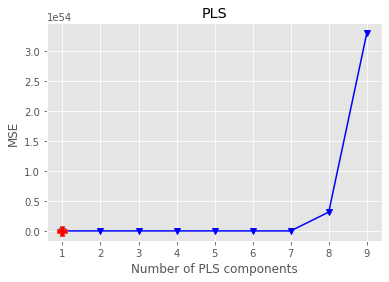

In [1169]:
plot_metrics(mses, 'MSE', 'min')

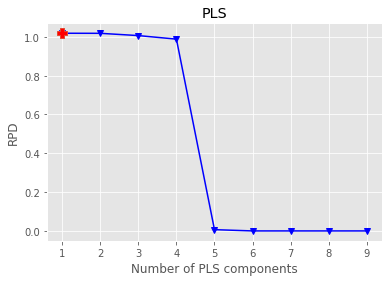

In [1170]:
plot_metrics(rpds, 'RPD', 'max')

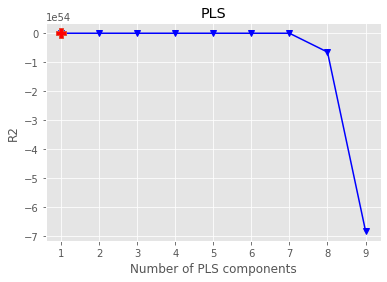

In [1171]:
plot_metrics(r2s, 'R2', 'max')

In [1172]:
y_cv, r2, mse, rpd = optimise_pls_cv(X2, y, 3)

In [1173]:
rmse = np.sqrt(mse)

In [1174]:
print('R2: %0.4f \n MSE: %0.4f \n RMSE: %0.4f \n RPD: %0.4f' %(r2, mse, rmse, rpd))

R2: 0.0128 
 MSE: 0.4773 
 RMSE: 0.6909 
 RPD: 1.0065


In [1175]:
#split the dataset into training (70%) and testing (30%) sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0) 

#calculate RMSE
pls = PLSRegression(n_components=3)
pls.fit(scale(X_train), y_train)

rmse = np.sqrt(mean_squared_error(y_test, pls.predict(scale(X_test))))

In [1176]:
print('R2: %0.4f \n MSE: %0.4f \n RMSE: %0.4f \n RPD: %0.4f' %(score, mse, rmse, rpd))

R2: 0.2620 
 MSE: 0.4773 
 RMSE: 0.5166 
 RPD: 1.0065


In [1177]:
print(f"R2: {score}")

R2: 0.26197570312629515


In [1178]:
error_airbnb_pls = pd.DataFrame({
  'Actual Values (log)': np.array(y_test).flatten(),
  'Predicted Values (log)': pls.predict(scale(X_test)).flatten()})
diff = np.array(y_test).flatten() - pls.predict(scale(X_test)).flatten()
error_airbnb_pls['Margin of Error'] = diff
erro_dol = np.exp(error_airbnb_pls['Margin of Error'])
error_airbnb_pls['Margin of Error (Dolar)'] = erro_dol
error_airbnb_pls.drop("Margin of Error", axis = 1, inplace = True)
error_airbnb_pls.to_csv('/content/error_airbnb_pls.csv', sep='\t', encoding='utf-8')
error_airbnb_pls

,Actual Values (log),Predicted Values (log),Margin of Error (Dolar)
0,5.420535,5.350137,1.072935
1,6.476972,5.276160,3.322815
2,5.707110,5.061563,1.907030
3,3.295837,4.538205,0.288700
4,4.836282,4.846845,0.989493
...,...,...,...
14664,4.248495,4.198396,1.051376
14665,5.398163,5.155024,1.275246
14666,5.298317,4.526230,2.164279
14667,5.017280,5.296999,0.755996


In [1179]:
erro_dol.mean()

1.2015277660769959

PCR Model

In [1180]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [1181]:
df

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price_log
0,1,108,40.64749,-73.97237,1,1,9,0.210000,6,365,5.010635
1,2,127,40.75362,-73.98377,0,1,45,0.380000,2,355,5.420535
2,2,94,40.80902,-73.94190,1,3,0,1.373221,1,365,5.017280
3,1,41,40.68514,-73.95976,0,1,270,4.640000,1,194,4.499810
4,2,61,40.79851,-73.94399,0,10,9,0.100000,1,0,4.394449
...,...,...,...,...,...,...,...,...,...,...,...
48890,1,13,40.67853,-73.94995,1,2,0,1.373221,2,9,4.262680
48891,1,28,40.70184,-73.93317,1,4,0,1.373221,2,36,3.713572
48892,2,94,40.81475,-73.94867,0,10,0,1.373221,1,27,4.753590
48893,2,95,40.75751,-73.99112,2,1,0,1.373221,6,2,4.025352


In [1182]:
#define predictor and response variables
X = df[["neighbourhood_group", "neighbourhood", "latitude", "longitude", "room_type", "minimum_nights", "number_of_reviews", "reviews_per_month", "calculated_host_listings_count", "availability_365"]]
y = df[["price_log"]]

#scale predictor variables
pca = PCA()
X_reduced = pca.fit_transform(scale(X))

#define cross validation method
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)

regr = LinearRegression()
mse = []

# Calculate MSE with only the intercept
score = -1*model_selection.cross_val_score(regr,
           np.ones((len(X_reduced),1)), y, cv=cv,
           scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using cross-validation, adding one component at a time
for i in np.arange(1, 6):
    score = -1*model_selection.cross_val_score(regr,
               X_reduced[:,:i], y, cv=cv, scoring='neg_mean_squared_error').mean()
    mse.append(score)

Text(0.5, 1.0, 'MSE vs. Number of Principal Components')

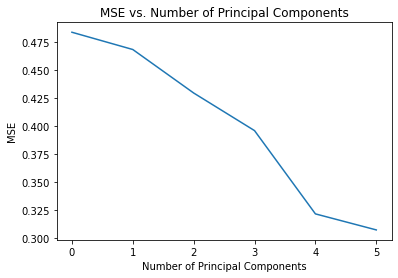

In [1183]:
# Plot cross-validation results    
plt.plot(mse)
plt.xlabel('Number of Principal Components')
plt.ylabel('MSE')
plt.title('MSE vs. Number of Principal Components')

In [1184]:
#split the dataset into training (70%) and testing (30%) sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1) 

#scale the training and testing data
X_reduced_train = pca.fit_transform(scale(X_train))
X_reduced_test = pca.transform(scale(X_test))[:,:2]

#train PCR model on training data 
regr = LinearRegression()
regr.fit(X_reduced_train[:,:2], y_train)

LinearRegression()

In [1185]:
X_reduced_train[:,:2]

array([[-0.15037606, -0.97710104],
       [-1.0809026 ,  2.65717929],
       [-0.85302592, -1.19109416],
       ...,
       [ 0.29060847, -0.52192545],
       [ 1.447854  , -0.68662086],
       [ 2.41172846, -0.48563755]])

In [1186]:
#calculate RMSE
pred = regr.predict(X_reduced_test)
rmse = np.sqrt(mean_squared_error(y_test, pred))
rmse

0.6485829851147814

In [1187]:
print(f"Valor do R2: {round(score, 3)}")
print(f"Valor do RMSE: {round(rmse, 3)}")

Valor do R2: 0.307
Valor do RMSE: 0.649


In [1188]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinat

Text(0, 0.5, 'weights')

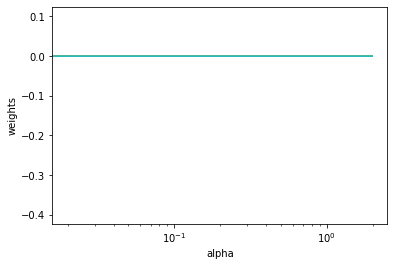

In [1189]:
lasso = Lasso(max_iter = 10000, normalize = True)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X_train), y_train)
    coefs.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [1190]:
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(X_train, y_train)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)
mean_squared_error(y_test, lasso.predict(X_test))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:1572: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,
/usr/local/lib/pyth

0.26419584904124493

In [1191]:
# Some of the coefficients are now reduced to exactly zero.
pd.Series(lasso.coef_, index=X.columns)

neighbourhood_group               0.052323
neighbourhood                     0.000567
latitude                          0.980149
longitude                        -3.662361
room_type                        -0.729420
minimum_nights                   -0.001691
number_of_reviews                -0.001040
reviews_per_month                 0.011970
calculated_host_listings_count    0.000086
availability_365                  0.000759
dtype: float64